<a href="https://colab.research.google.com/github/copysb/university/blob/main/%D0%9B%D0%B0%D0%B1%D0%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# скачиваем файл
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1cq9JDz8-zwzoGL6udiT_ogHHRWdnsd1q' -O math_students.csv

--2024-04-05 13:02:17--  https://docs.google.com/uc?export=download&id=1cq9JDz8-zwzoGL6udiT_ogHHRWdnsd1q
Resolving docs.google.com (docs.google.com)... 173.194.174.100, 173.194.174.139, 173.194.174.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.174.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1cq9JDz8-zwzoGL6udiT_ogHHRWdnsd1q&export=download [following]
--2024-04-05 13:02:17--  https://drive.usercontent.google.com/download?id=1cq9JDz8-zwzoGL6udiT_ogHHRWdnsd1q&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.97.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42379 (41K) [application/octet-stream]
Saving to: ‘math_students.csv’

math_students.csv   100%[===================>]  41.39K  --.-KB/s 

In [ ]:
import pandas as pd
data = pd.read_csv('math_students.csv', delimiter=',')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


1. Какое значение признака "время от дома до школы" была самой редкой для школы Gabriel Pereira? В качестве ответа приведите соответствующее значение признака.

In [ ]:
print(data[['school', 'traveltime']][data.school == 'GP'].value_counts())
print('Значение "время от дома до школы" равный 4-ем было самым редким для школы GP')

school  traveltime
GP      1             243
        2              84
        3              15
        4               7
dtype: int64
Значение "время от дома до школы" равный 4-ем было самым редким для школы GP


2. Найдите количество студентов, у которых у отца есть высшее образование, а у матери нет.

In [ ]:
print(data.loc[(data['Fedu'] == 4) & ((data['Medu'] != 4)), ['Fedu', 'Medu']].value_counts().sum())

print('Кол-во студентов, у которых у отца есть высшее образование, а у матери нет, равно 26')

26
Кол-во студентов, у которых у отца есть высшее образование, а у матери нет, равно 26


3. Найдите минимальный возраст учащегося школы Gabriel Pereira.

In [ ]:
print(data.loc[(data['school'] == 'GP'), ['school', 'age']].min())

print('Минимальный возраст учащегося школы Gabriel Pereira равен 15')

school    GP
age       15
dtype: object
Минимальный возраст учащегося школы Gabriel Pereira равен 15


4. Найдите количество студентов, имеющих четное число пропусков и которые не посещали детский сад

In [ ]:
print(data.loc[(data['nursery'] == 'no') & ((data.absences % 2 == 0)), ['nursery', 'absences']].value_counts().sum())

print('Кол-во студентов: 71')

71
Кол-во студентов: 71


5. Найдите разность между оценками за первый семестр студентов, которые получают помощь от семьи при выполнении заданий и теми, кто не получает помощь при выполнении заданий. В качестве ответа приведите число, округленное до двух значащих цифр после запятой.

In [ ]:
yes = data.loc[(data['famsup'] == 'yes'), ['G1']].mean()
no = data.loc[(data['famsup'] == 'no'), ['G1']].mean()
print(round(no - yes, 2))


G1    0.58
dtype: float64


6. Построить график зависимости между romantic и итоговой оценкой. Какой вывод можно сделать?



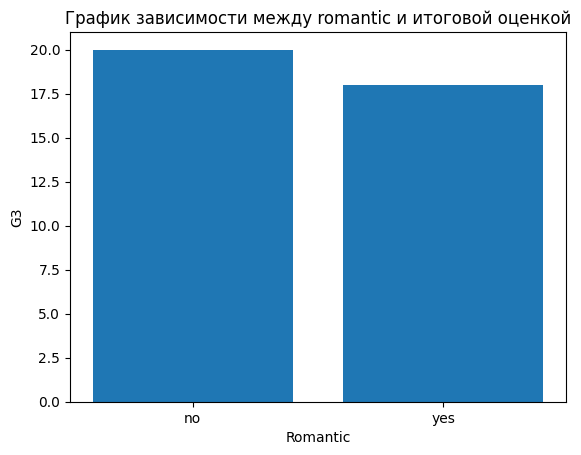

In [ ]:
import matplotlib.pyplot as plt

romantic = data.romantic
G3 = data.G3
plt.xlabel('Romantic')
plt.ylabel('G3')
plt.title('График зависимости между romantic и итоговой оценкой')
plt.bar(romantic, G3)
plt.show()